# **Dataset Loading and Preprocessing**


We load the CIFAR-10 dataset using Keras, normalize the pixel values, and split the original training set into a new training and validation set. Normalization (scaling pixel values to [0,1]) is standard for neural networks. We also one-hot encode the labels for 10-way classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [2]:
# Load CIFAR-10 data (50k train, 10k test)
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Normalize pixel values to [0,1]
trainX = trainX.astype('float32') / 255.0
testX  = testX.astype('float32') / 255.0

# Convert labels to one-hot vectors
num_classes = 10
trainY_cat = to_categorical(trainY, num_classes)
testY_cat  = to_categorical(testY,  num_classes)

# Split training set into train (90%) and validation (10%) sets
trainX, valX, trainY_cat, valY_cat = train_test_split(
    trainX, trainY_cat, test_size=0.1, random_state=42)

print(f"Train: {trainX.shape}, Validation: {valX.shape}, Test: {testX.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Train: (45000, 32, 32, 3), Validation: (5000, 32, 32, 3), Test: (10000, 32, 32, 3)


We define a simple CNN using Keras. For example, two convolutional blocks (Conv->ReLU->MaxPool), followed by one or two dense layers. We compile with categorical crossentropy loss and train with the Adam optimizer. We train for several epochs (e.g. 10–20) on the training set, using the validation set to monitor overfitting.

In [3]:
# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and store the training history
history = model.fit(
    trainX, trainY_cat,
    epochs=15,
    batch_size=64,
    validation_data=(valX, valY_cat),
    verbose=1
)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 69s 95ms/step - accuracy: 0.3631 - loss: 1.7486 - val_accuracy: 0.5212 - val_loss: 1.3224
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.5550 - loss: 1.2610 - val_accuracy: 0.5968 - val_loss: 1.1347
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 73s 83ms/step - accuracy: 0.6223 - loss: 1.0741 - val_accuracy: 0.6078 - val_loss: 1.1073
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 88s 92ms/step - accuracy: 0.6591 - loss: 0.9725 - val_accuracy: 0.6404 - val_loss: 1.0085
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.6895 - loss: 0.9094 - val_accuracy: 0.6526 - val_loss: 0.9852
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - accuracy: 0.7028 - loss: 0.8557 - val_accuracy: 0.6636 - val_loss: 0.9654
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 70s 99ms/step - accuracy: 0.7261 - loss: 0.7960 - val_accuracy: 0.6804 - val_loss: 0.9298
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 76s 91ms/step - accuracy: 0.7412 - loss: 0.7519 - 

After training, we plot the training and validation accuracy and loss over epochs to check for convergence. The plots shows improving training accuracy and relatively stable validation accuracy if the model is well-behaved.


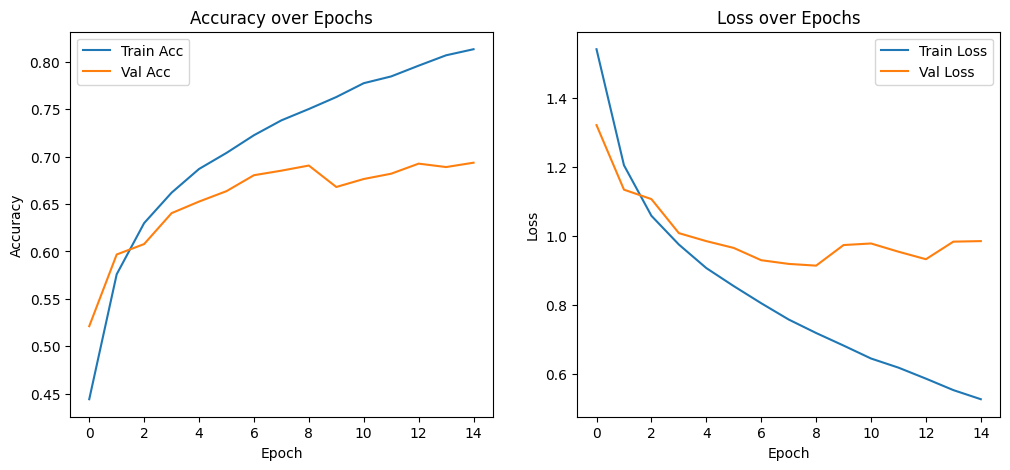

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.show()


Finally, we evaluate the trained model on the clean test set (unaltered CIFAR-10 images) to get a baseline accuracy and confusion matrix. The confusion matrix shows which classes are most often confused by the model.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Evaluate on clean test data
test_loss, test_acc = model.evaluate(testX, testY_cat, verbose=0)
print(f"Clean test accuracy: {test_acc:.4f}")

# Compute predictions and confusion matrix
pred_probs = model.predict(testX)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = testY.flatten()
cm_clean = confusion_matrix(true_labels, pred_labels)


Clean test accuracy: 0.6939
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


We can plot the normalized confusion matrix using seaborn heatmap. For clarity, we might annotate the main diagonal (accuracy per class) and see where most errors occur.

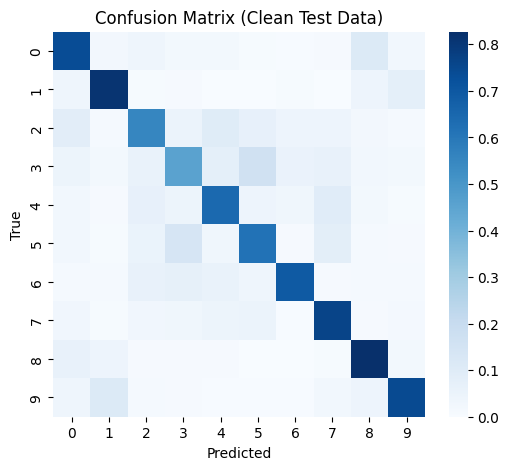

In [ ]:
import seaborn as sns

cm_norm = cm_clean.astype('float') / cm_clean.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=False, cmap='Blues')
plt.title("Confusion Matrix (Clean Test Data)")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


# **Input Distortion with Noise**


To test robustness, we add noise to the test images without retraining the model. We consider three noise types:


*   Gaussian noise: Additive random noise drawn from a normal distribution (mean=0, some variance). This simulates sensor noise or blurring effects.

*   Salt-and-Pepper noise: Random pixels are set to black or white (simulating dead pixels or impulse noise)

*   Speckle noise: Multiplicative noise (each pixel is multiplied by random noise), common in radar or medical imaging.

We create noisy copies of the test set by applying these distortions. Using skimage.util.random_noise is one approach.

In [ ]:
from skimage.util import random_noise

def add_noise(imgs, mode, **kwargs):
    noisy = np.empty_like(imgs)
    for i, img in enumerate(imgs):
        noisy_img = random_noise(img, mode=mode, **kwargs)
        noisy[i] = (noisy_img * 255).astype(np.uint8) / 255.0
    return noisy

# Parameters for noise
gauss_var = 0.01    # variance for Gaussian
snp_amount = 0.05   # proportion of pixels for salt-and-pepper
speckle_var = 0.01 # variance for Speckle

# Generate noisy test sets
testX_gauss   = add_noise(testX, mode='gaussian', var=gauss_var)
testX_saltpep = add_noise(testX, mode='s&p', amount=snp_amount)
testX_speckle = add_noise(testX, mode='speckle', var=speckle_var)

#Generate noisy train sets
trainX_gauss   = add_noise(trainX, mode='gaussian', var=gauss_var)
trainX_saltpep = add_noise(trainX, mode='s&p', amount=snp_amount)
trainX_speckle = add_noise(trainX, mode='speckle', var=speckle_var)


We visualize a few sample images side-by-side: the original (clean) image and its corrupted versions. For clarity, pick a handful of test images and display a grid with each noise type. (In code, this would use plt.imshow; here we describe the result.)

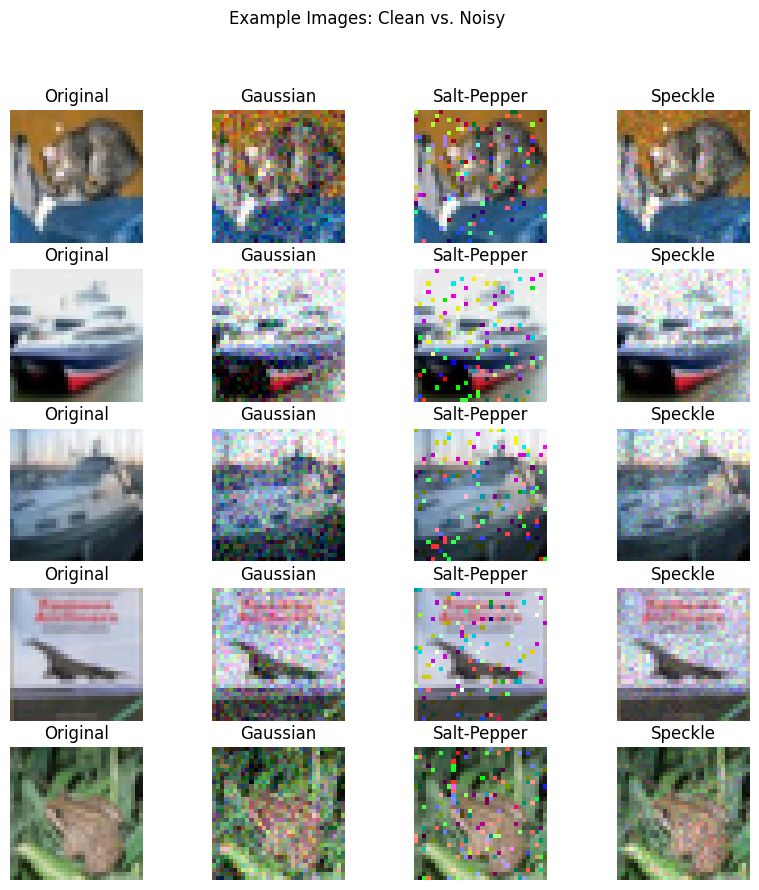

In [ ]:
# Example visualization of clean vs. noise (not shown here)
import matplotlib.pyplot as plt

num_examples = 5
fig, axes = plt.subplots(num_examples, 4, figsize=(10,10))
for i in range(num_examples):
    axes[i,0].imshow(testX[i])
    axes[i,0].set_title("Original"); axes[i,0].axis('off')
    axes[i,1].imshow(testX_gauss[i])
    axes[i,1].set_title("Gaussian"); axes[i,1].axis('off')
    axes[i,2].imshow(testX_saltpep[i])
    axes[i,2].set_title("Salt-Pepper"); axes[i,2].axis('off')
    axes[i,3].imshow(testX_speckle[i])
    axes[i,3].set_title("Speckle"); axes[i,3].axis('off')
plt.suptitle("Example Images: Clean vs. Noisy")
plt.show()


Here we concatenate the correct Images with the distorted images , and same for class names.

In these visualizations, one can see that Gaussian noise adds mild graininess, salt-and-pepper noise produces stark white/black dots, and speckle noise adds a grainy multiplicative effect. Salt-and-pepper often appears most disruptive even if only a small fraction of pixels are affected.

# **Evaluation on Noisy Data**

We now evaluate the same CNN (trained on clean data) on each noisy test set. We record accuracy and confusion matrices to quantify how performance degrades under each corruption type.

In [ ]:
# Evaluate on noisy datasets
loss_gauss,   acc_gauss   = model.evaluate(testX_gauss,   testY_cat, verbose=0)
loss_saltpep, acc_saltpep = model.evaluate(testX_saltpep, testY_cat, verbose=0)
loss_speckle, acc_speckle = model.evaluate(testX_speckle, testY_cat, verbose=0)
#Evalute on clean Datasets
loss_clean, acc_clean = model.evaluate(testX, testY_cat, verbose=0)

#Print the acc
print(f"Clean Acc: {test_acc:.4f}")
print(f"Gaussian Noise Acc: {acc_gauss:.4f}")
print(f"Salt-Pepper Noise Acc: {acc_saltpep:.4f}")
print(f"Speckle Noise Acc: {acc_speckle:.4f}")


Gaussian Noise Acc: 0.5611
Salt-Pepper Noise Acc: 0.5196
Speckle Noise Acc: 0.6548


We also compute confusion matrices for each noisy set:

In [ ]:
# Predictions on noisy sets
pred_gauss   = np.argmax(model.predict(testX_gauss), axis=1)
pred_saltpep = np.argmax(model.predict(testX_saltpep), axis=1)
pred_speckle = np.argmax(model.predict(testX_speckle), axis=1)

cm_gauss   = confusion_matrix(true_labels, pred_gauss)
cm_saltpep = confusion_matrix(true_labels, pred_saltpep)
cm_speckle = confusion_matrix(true_labels, pred_speckle)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


We can visualize these confusion matrices (normalized by true class) side-by-side. This highlights how noise scatters the model’s predictions, often making them less confident and more spread-out across wrong classes. For example, salt-and-pepper noise may drastically confuse the model if important pixel details are lost.

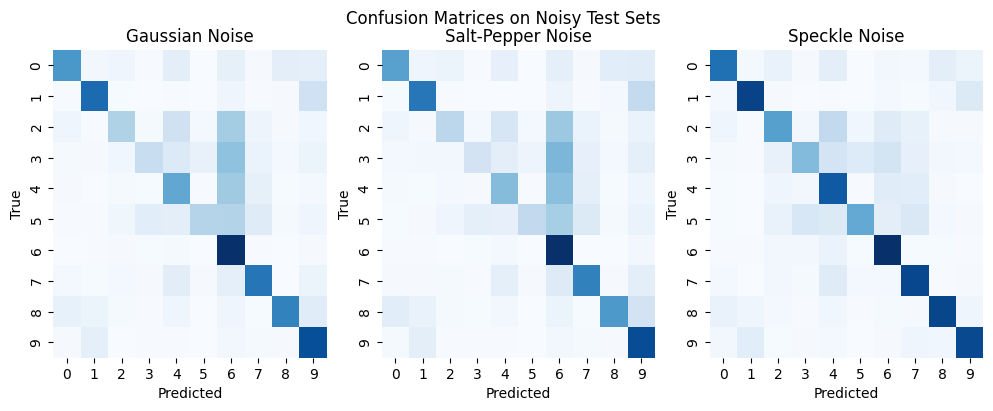

In [ ]:
# Plotting all confusion matrices
fig, axs = plt.subplots(1,3, figsize=(12,4))
for ax, cm, title in zip(axs, [cm_gauss, cm_saltpep, cm_speckle],
                        ["Gaussian", "Salt-Pepper", "Speckle"]):
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, ax=ax, cbar=False, cmap='Blues', annot=False)
    ax.set_title(f"{title} Noise")
    ax.set_xlabel("Predicted"); ax.set_ylabel("True")
plt.suptitle("Confusion Matrices on Noisy Test Sets")
plt.show()


We also compare overall accuracies in a single plot for clarity:

<ipython-input-24-d73c203757d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


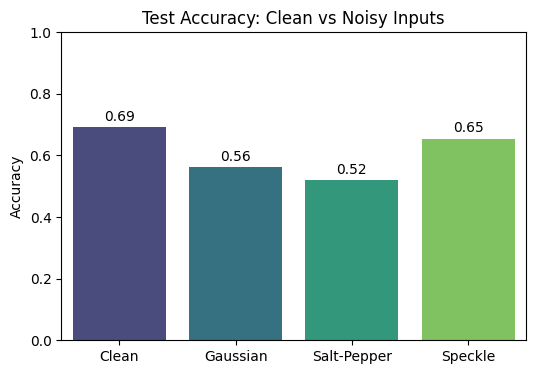

In [ ]:
# Bar plot of accuracies
labels = ['Clean', 'Gaussian', 'Salt-Pepper', 'Speckle']
accuracies = [test_acc, acc_gauss, acc_saltpep, acc_speckle]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0,1.0)
plt.title("Test Accuracy: Clean vs Noisy Inputs")
plt.ylabel("Accuracy")
for i, v in enumerate(accuracies):
    plt.text(i, v+0.02, f"{v:.2f}", ha='center')
plt.show()


This plot quantitatively shows the drop in accuracy caused by each noise type. In general, salt-and-pepper and speckle noise often hurt performance more than mild Gaussian noise, because they can obliterate key features.

# **Visualizations and Prediction Confidence**

Finally, we inspect specific examples to see how the model’s predictions and confidence change. We pick a few test images, show the model’s predicted class (and probability) for the clean image and for each noisy version. We also plot the softmax probability distribution for the predicted class as a proxy for confidence.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


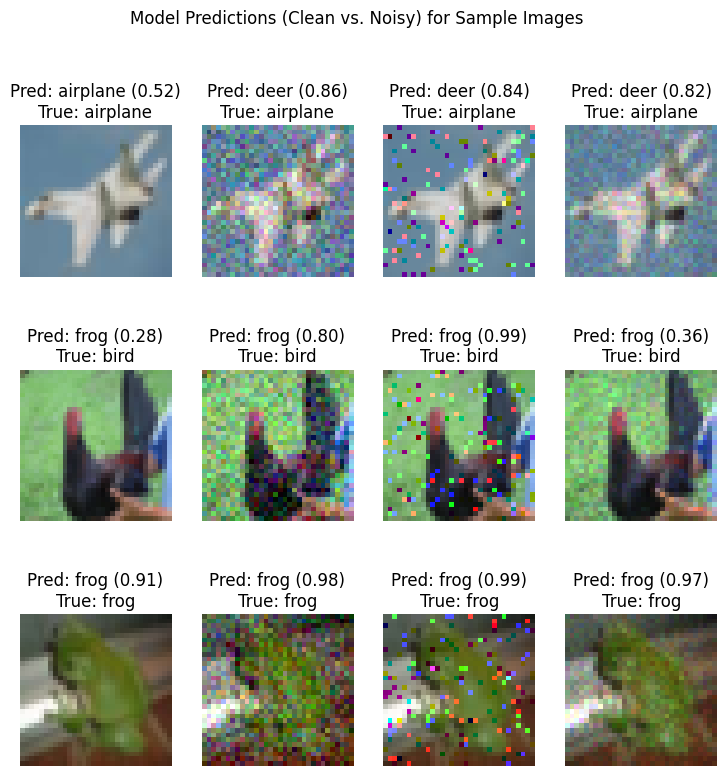

In [ ]:
import numpy as np

# Function to display image with prediction and confidence
def show_prediction(img, model, label, class_names):
    probs = model.predict(img[np.newaxis, ...])[0]
    pred = np.argmax(probs)
    conf = probs[pred]
    title = f"Pred: {class_names[pred]} ({conf:.2f})\nTrue: {class_names[label]}"
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Class names for CIFAR-10
class_names = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

# Select a few sample indices
sample_idx = [10, 25, 7]  # example indices from the test set

plt.figure(figsize=(9, 9))
for i, idx in enumerate(sample_idx):
    # Original image
    plt.subplot(len(sample_idx), 4, 4*i + 1)
    show_prediction(testX[idx], model, testY.flatten()[idx], class_names)

    # Gaussian
    plt.subplot(len(sample_idx), 4, 4*i + 2)
    show_prediction(testX_gauss[idx], model, testY.flatten()[idx], class_names)

    # Salt-Pepper
    plt.subplot(len(sample_idx), 4, 4*i + 3)
    show_prediction(testX_saltpep[idx], model, testY.flatten()[idx], class_names)

    # Speckle
    plt.subplot(len(sample_idx), 4, 4*i + 4)
    show_prediction(testX_speckle[idx], model, testY.flatten()[idx], class_names)
plt.suptitle("Model Predictions (Clean vs. Noisy) for Sample Images")
plt.show()


In the above visualizations, each row is one image in different conditions. The title shows Pred: (predicted class and confidence) vs True: label. Often we observe that on noisy inputs the model’s confidence (softmax probability) drops significantly. For example, a clean image of a “cat” might be predicted with 95% confidence, whereas the salt-and-pepper version might only give 50% confidence or even misclassify it entirely.

To illustrate confidence more quantitatively, one could also plot the softmax probability distributions (e.g. a bar plot of all class probabilities) for one example. This would show how noise flattens the distribution (lower peak for the predicted class).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


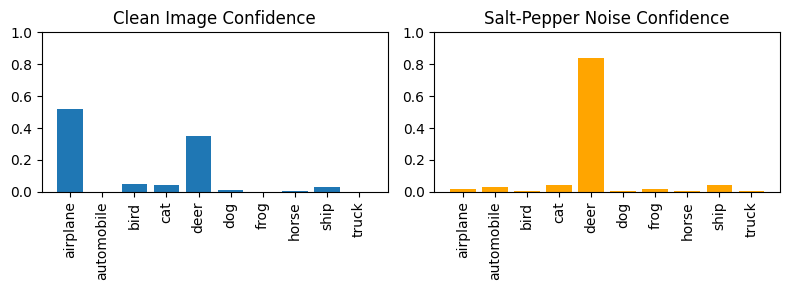

In [ ]:
# Softmax confidence bar for one example (e.g., sample_idx[0])
idx = sample_idx[0]
probs_clean = model.predict(testX[idx:idx+1])[0]
probs_snp   = model.predict(testX_saltpep[idx:idx+1])[0]

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.bar(range(num_classes), probs_clean)
plt.xticks(range(num_classes), class_names, rotation=90)
plt.title("Clean Image Confidence")
plt.ylim([0,1])

plt.subplot(1,2,2)
plt.bar(range(num_classes), probs_snp, color='orange')
plt.xticks(range(num_classes), class_names, rotation=90)
plt.title("Salt-Pepper Noise Confidence")
plt.ylim([0,1])
plt.tight_layout()
plt.show()


The figure compares model confidence across 10 image classes for a clean input (left) and the same input corrupted with salt-and-pepper noise (right). In the clean image, the model shows highest confidence in the airplane class (0.55), followed by cat and deer, while other classes remain near zero. However, under salt-and-pepper noise, the confidence dramatically shifts, with deer becoming dominant (0.85), indicating a severe misclassification. This illustrates the model's vulnerability to noise, where even moderate perturbations can lead to highly confident but incorrect predictions.

# **Adverserial Attack and Optimization**
We will use minimal FGSM(Fast Gradient Sign Method) to generate adverserial copies from the original data,and including them in the training process, this way we will check if the model is vulnerbale to advarserial attacks and if so we refine it to be robust.

## **Define FGSM generation function**
we start by converting the dataset to tensors, then compute the model perturbation and the cross-entropy loss between predictions and true labels, and Finally we calculate the gradient of the loss with respect to the input images , and based on that we generate the perturbation.

In [4]:
import tensorflow as tf

def create_adversarial_pattern(model, input_image, input_label):
    input_image = tf.convert_to_tensor(input_image)
    input_label = tf.convert_to_tensor(input_label)

    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.categorical_crossentropy(input_label, prediction)

    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

##**Generate the Adversarial Training Data**
Using  the function declared above we will generate the advarserial Train dataset from trainX, with perturbation strengeth of 1%, (epsilon = 0.O1), this means that the perturbation will be small and hard to notice(weaker attack)


In [5]:
epsilon = 0.01
adv_trainX = []
for i in range(len(trainX)):
    img = np.expand_dims(trainX[i], axis=0)
    label = np.expand_dims(trainY_cat[i], axis=0)
    perturbation = create_adversarial_pattern(model, img, label)
    adv_img = img + epsilon * perturbation
    adv_img = tf.clip_by_value(adv_img, 0.0, 1.0)
    adv_trainX.append(adv_img.numpy()[0])
adv_trainX = np.array(adv_trainX)
adv_trainY = trainY_cat.copy()

##**Combine Clean and Adversarial Data:**
Now we create the augmented dataset by combiniong the clean dataset with the adversarial,then shuffle them for better training.

In [6]:
aug_trainX = np.concatenate([trainX, adv_trainX], axis=0)
aug_trainY = np.concatenate([trainY_cat, adv_trainY], axis=0)

indices = np.arange(aug_trainX.shape[0])
np.random.shuffle(indices)
aug_trainX = aug_trainX[indices]
aug_trainY = aug_trainY[indices]

##**Retrain the model with new augmented dateset**
using the same model we will retraine it with augmented dataset, using the same hyperparameters.

In [7]:
history = model.fit(
    aug_trainX, aug_trainY,
    epochs=15,
    batch_size=64,
    validation_data=(valX, valY_cat),
    verbose=1
)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 108s 74ms/step - accuracy: 0.4013 - loss: 1.6512 - val_accuracy: 0.5804 - val_loss: 1.1791
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 138s 71ms/step - accuracy: 0.6241 - loss: 1.0758 - val_accuracy: 0.6280 - val_loss: 1.0600
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 138s 69ms/step - accuracy: 0.6820 - loss: 0.9224 - val_accuracy: 0.6632 - val_loss: 0.9775
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 141s 68ms/step - accuracy: 0.7108 - loss: 0.8323 - val_accuracy: 0.6636 - val_loss: 0.9902
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 68ms/step - accuracy: 0.7379 - loss: 0.7601 - val_accuracy: 0.6778 - val_loss: 0.9225
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 68ms/step - accuracy: 0.7591 - loss: 0.7000 - val_accuracy: 0.6776 - val_loss: 0.9459
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 68ms/step - accuracy: 0.7798 - loss: 0.6452 - val_accuracy: 0.6934 - val_loss: 0.9323
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 141s 68ms/step - accuracy: 

After training, we plot the training and validation accuracy and loss over epochs to check for convergence

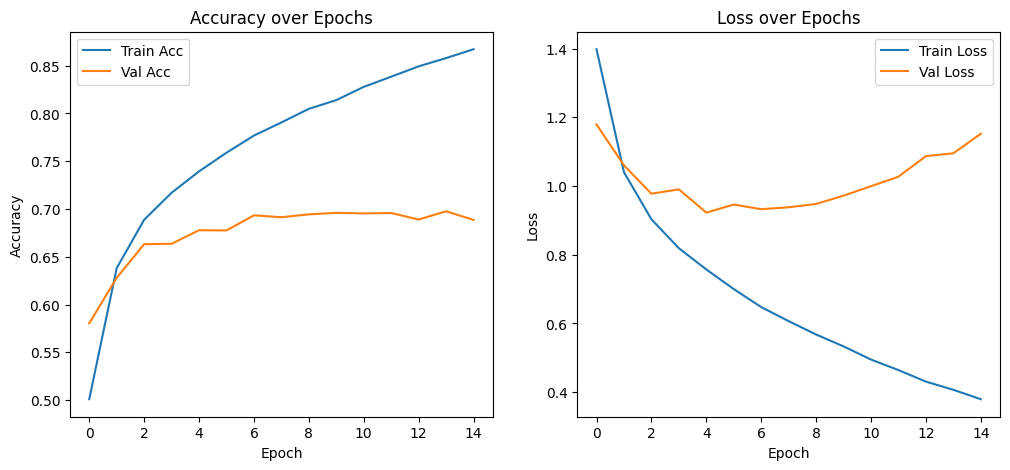

In [8]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.show()


##**Generate the adverserial test set and evaluate the accuracy**
using the same steps in the function of FGSM to generate the datase to evaluate the accuract and check if the model robust against FGSM attacks.

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
adv_testX = []
for i in range(len(testX)):
    img = np.expand_dims(testX[i], axis=0)
    label = np.expand_dims(testY_cat[i], axis=0)
    perturbation = create_adversarial_pattern(model, img, label)
    adv_img = img + epsilon * perturbation
    adv_img = tf.clip_by_value(adv_img, 0.0, 1.0)
    adv_testX.append(adv_img.numpy()[0])
adv_testX = np.array(adv_testX)

loss_adv, acc_adv = model.evaluate(adv_testX, testY_cat, verbose=0)
print(f"FGSM Adversarial Test Accuracy: {acc_adv:.4f}")

# Compute predictions and confusion matrix
pred_probs = model.predict(adv_testX)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = testY.flatten()
cm_clean = confusion_matrix(true_labels, pred_labels)

FGSM Adversarial Test Accuracy: 0.1298
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


Here we're ploting again the normalized confusion matrix using seaborn heatmap. For clarity, we might annotate the main diagonal (accuracy per class) and see where most errors occur.

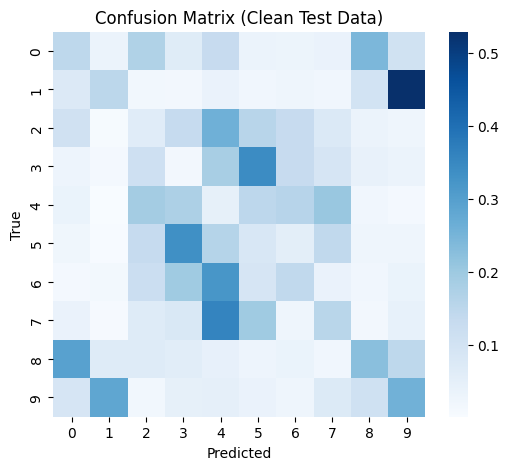

In [12]:
import seaborn as sns

cm_norm = cm_clean.astype('float') / cm_clean.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=False, cmap='Blues')
plt.title("Confusion Matrix (Clean Test Data)")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

# **Conclusion and Summary**

